In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
boston_df = pd.read_csv('../Data/Boston.csv')
print (boston_df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


#### Python regression with Boston housing data.
#### https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [5]:
### medv ~ rm using statsmodel
x = pd.DataFrame(boston_df['rm'])
x = sm.add_constant(x)
y = pd.DataFrame(boston_df['medv'])
sm_mod0 = sm.OLS(y,x)
sm_fit0 = sm_mod0.fit()
sm_pred0 = sm_fit0.predict(x)

### medv ~ rm using sklearn
x = pd.DataFrame(boston_df['rm'])
y = pd.DataFrame(boston_df['medv'])
sk_mod0 = linear_model.LinearRegression()
sk_fit0 = sk_mod0.fit(x,y)
sk_pred0 = sk_mod0.predict(x)

print ('\nstatsmodels')
print (sm_fit0.summary())
print (sm_pred0[0:5])

print ('\nsklearn')
print ('R2={}'.format(sk_mod0.score(x,y)))
print ('intercept={},slope={}'.format(sk_mod0.intercept_, sk_mod0.coef_[0]))
print (sk_pred0[0:5])


statsmodels
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           2.49e-74
Time:                        19:43:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13

In [15]:
### medv ~ lstat + chas + lstat*chas
x = pd.DataFrame(boston_df[['lstat','chas']])
x['lstat*chas'] = x.eval('lstat*chas')
x = sm.add_constant(x)
y = pd.DataFrame(boston_df['medv'])
sm_mod1 = sm.OLS(y,x)
sm_fit1 = sm_mod1.fit()
sm_pred1 = sm_fit1.predict(x)
print ('statsmodels')
print (sm_fit1.summary())

''' results from R lm
> print (summary(fit1))
Call:
lm(formula = medv ~ lstat * chas)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.657  -3.787  -1.289   1.644  24.953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.76716    0.57018  59.222  < 2e-16 ***
lstat       -0.91498    0.03897 -23.478  < 2e-16 ***
chas         9.82513    2.10320   4.672 3.84e-06 ***
lstat:chas  -0.43288    0.16017  -2.703  0.00711 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.057 on 502 degrees of freedom
Multiple R-squared:  0.5688,	Adjusted R-squared:  0.5663
'''

statsmodels
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     220.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           2.68e-91
Time:                        21:10:40   Log-Likelihood:                -1627.4
No. Observations:                 506   AIC:                             3263.
Df Residuals:                     502   BIC:                             3280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7672      0.570     59.

' results from R lm\n> print (summary(fit1))\nCall:\nlm(formula = medv ~ lstat * chas)\n\nResiduals:\n    Min      1Q  Median      3Q     Max \n-14.657  -3.787  -1.289   1.644  24.953 \n\nCoefficients:\n            Estimate Std. Error t value Pr(>|t|)    \n(Intercept) 33.76716    0.57018  59.222  < 2e-16 ***\nlstat       -0.91498    0.03897 -23.478  < 2e-16 ***\nchas         9.82513    2.10320   4.672 3.84e-06 ***\nlstat:chas  -0.43288    0.16017  -2.703  0.00711 ** \n---\nSignif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1\n\nResidual standard error: 6.057 on 502 degrees of freedom\nMultiple R-squared:  0.5688,\tAdjusted R-squared:  0.5663\n'

In [32]:
### medv ~ lstat + chas + lstat*lstat + lstat*chas + lstat*lstat*chas

### use statsmodels.apid
x = pd.DataFrame(boston_df[['lstat','chas']])
x['lstat*lstat'] = x.eval('lstat*lstat')
x['lstat*chas'] = x.eval('lstat*chas')
x['lstat*lstat*chas'] = x.eval('lstat*lstat*chas')
x = sm.add_constant(x)
y = pd.DataFrame(boston_df['medv'])
sm_mod2 = sm.OLS(y,x)
sm_fit2 = sm_mod2.fit()
sm_pred2 = sm_fit2.predict(x)
print ('statsmodels')
print (sm_fit2.summary())
print (sm_pred2[0:5])

### use statsmodels.formula.api
smf_mod2 = smf.ols(formula = "medv ~ lstat*chas + I(lstat*lstat)*chas", data = boston_df)
smf_fit2 = smf_mod2.fit()
smf_pred2 = smf_fit2.predict(boston_df[['lstat','chas']])
print ('statsmodels.formula')
print (smf_fit2.summary())
print (smf_pred2[0:5])

### compare predictions from statsmodels.api and statsmodels.formula.api
print ('corr(sm_pred, smf_pred)')
print (np.corrcoef(sm_pred2, smf_pred2))

''' results from R lm
> summary(fit2)
Call:
lm(formula = medv ~ lstat * chas + I(lstat^2) * chas)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4823  -3.6231  -0.4634   2.3834  25.7495 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     41.793297   0.894872  46.703  < 2e-16 ***
lstat           -2.230905   0.125886 -17.722  < 2e-16 ***
chas            11.935120   3.024405   3.946 9.07e-05 ***
I(lstat^2)       0.040935   0.003765  10.871  < 2e-16 ***
lstat:chas      -1.312077   0.524486  -2.502   0.0127 *  
chas:I(lstat^2)  0.044695   0.019488   2.293   0.0222 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.372 on 500 degrees of freedom
Multiple R-squared:  0.6622,	Adjusted R-squared:  0.6588 
F-statistic:   196 on 5 and 500 DF,  p-value: < 2.2e-16
'''

statsmodels
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          2.34e-115
Time:                        21:27:58   Log-Likelihood:                -1565.6
No. Observations:                 506   AIC:                             3143.
Df Residuals:                     500   BIC:                             3169.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.7933 

' results from R lm\n> summary(fit2)\nCall:\nlm(formula = medv ~ lstat * chas + I(lstat^2) * chas)\n\nResiduals:\n     Min       1Q   Median       3Q      Max \n-15.4823  -3.6231  -0.4634   2.3834  25.7495 \n\nCoefficients:\n                 Estimate Std. Error t value Pr(>|t|)    \n(Intercept)     41.793297   0.894872  46.703  < 2e-16 ***\nlstat           -2.230905   0.125886 -17.722  < 2e-16 ***\nchas            11.935120   3.024405   3.946 9.07e-05 ***\nI(lstat^2)       0.040935   0.003765  10.871  < 2e-16 ***\nlstat:chas      -1.312077   0.524486  -2.502   0.0127 *  \nchas:I(lstat^2)  0.044695   0.019488   2.293   0.0222 *  \n---\nSignif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1\n\nResidual standard error: 5.372 on 500 degrees of freedom\nMultiple R-squared:  0.6622,\tAdjusted R-squared:  0.6588 \nF-statistic:   196 on 5 and 500 DF,  p-value: < 2.2e-16\n'

Text(0.5,1,'medv ~ lstat + chas + lstat*lstat + lstat*chas + lstat*lstat*chas')

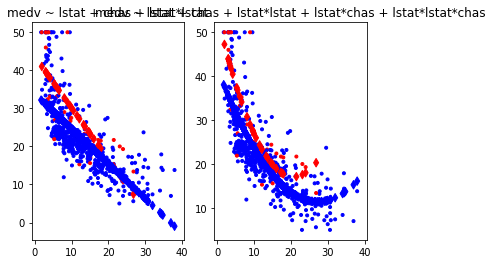

In [44]:
color = ['blue' if x == 0 else 'red' for x in boston_df['chas']]
fix, ax = plt.subplots(1, 2)
ax[0].scatter(boston_df['lstat'], boston_df['medv'], marker='.', color=color)
ax[0].scatter(boston_df['lstat'], sm_pred1, marker='d', color=color)
ax[0].set_title('medv ~ lstat + chas + lstat*lstat')

ax[1].scatter(boston_df['lstat'], boston_df['medv'], marker='.', color=color)
ax[1].scatter(boston_df['lstat'], sm_pred2, marker='d', color=color)
ax[1].set_title('medv ~ lstat + chas + lstat*lstat + lstat*chas + lstat*lstat*chas')

#### Python regression with categorical variables
#### 3.3 in http://songhuiming.github.io/pages/2017/01/21/linear-regression-in-python-chapter-3-regression-with-categorical-predictors/

In [35]:
### medv ~ lstat*as.factor(rad)

### use statsmodels.formula.api
smf_mod3 = smf.ols(formula = "medv ~ lstat*C(rad)", data = boston_df)
smf_fit3 = smf_mod3.fit()
smf_pred3 = smf_fit3.predict(boston_df[['lstat','rad']])
print ('statsmodels.formula')
print (smf_fit3.summary())

''' results from R lm
Call:
lm(formula = medv ~ lstat * as.factor(rad))

Residuals:
    Min      1Q  Median      3Q     Max 
-11.439  -3.460  -1.111   1.633  25.765 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             39.1899     4.2173   9.293  < 2e-16 ***
lstat                   -2.0115     0.5427  -3.706 0.000234 ***
as.factor(rad)2         -3.2837     4.7747  -0.688 0.491945    
as.factor(rad)3         -1.6923     4.6198  -0.366 0.714285    
as.factor(rad)4         -8.8114     4.3905  -2.007 0.045308 *  
as.factor(rad)5         -2.9215     4.3610  -0.670 0.503235    
as.factor(rad)6        -14.0131     5.8270  -2.405 0.016550 *  
as.factor(rad)7         -2.5461     5.4961  -0.463 0.643384    
as.factor(rad)8          3.9611     4.9426   0.801 0.423276    
as.factor(rad)24        -6.7270     4.4760  -1.503 0.133508    
lstat:as.factor(rad)2    1.1065     0.5741   1.927 0.054533 .  
lstat:as.factor(rad)3    0.9572     0.5712   1.676 0.094433 .  
lstat:as.factor(rad)4    1.2745     0.5499   2.318 0.020881 *  
lstat:as.factor(rad)5    1.0205     0.5502   1.855 0.064210 .  
lstat:as.factor(rad)6    1.6702     0.6263   2.667 0.007911 ** 
lstat:as.factor(rad)7    0.8175     0.6755   1.210 0.226760    
lstat:as.factor(rad)8    0.4046     0.6131   0.660 0.509658    
lstat:as.factor(rad)24   1.1482     0.5480   2.095 0.036660 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.977 on 488 degrees of freedom
Multiple R-squared:  0.5919,	Adjusted R-squared:  0.5777 
F-statistic: 41.63 on 17 and 488 DF,  p-value: < 2.2e-16
'''

statsmodels.formula
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     41.63
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           1.39e-83
Time:                        21:38:57   Log-Likelihood:                -1613.5
No. Observations:                 506   AIC:                             3263.
Df Residuals:                     488   BIC:                             3339.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

' results from R lm\nCall:\nlm(formula = medv ~ lstat * as.factor(rad))\n\nResiduals:\n    Min      1Q  Median      3Q     Max \n-11.439  -3.460  -1.111   1.633  25.765 \n\nCoefficients:\n                       Estimate Std. Error t value Pr(>|t|)    \n(Intercept)             39.1899     4.2173   9.293  < 2e-16 ***\nlstat                   -2.0115     0.5427  -3.706 0.000234 ***\nas.factor(rad)2         -3.2837     4.7747  -0.688 0.491945    \nas.factor(rad)3         -1.6923     4.6198  -0.366 0.714285    \nas.factor(rad)4         -8.8114     4.3905  -2.007 0.045308 *  \nas.factor(rad)5         -2.9215     4.3610  -0.670 0.503235    \nas.factor(rad)6        -14.0131     5.8270  -2.405 0.016550 *  \nas.factor(rad)7         -2.5461     5.4961  -0.463 0.643384    \nas.factor(rad)8          3.9611     4.9426   0.801 0.423276    \nas.factor(rad)24        -6.7270     4.4760  -1.503 0.133508    \nlstat:as.factor(rad)2    1.1065     0.5741   1.927 0.054533 .  \nlstat:as.factor(rad)3    0.9572 

In [46]:
### medv ~ lstat*as.factor(rad) + lstat*lstat*as.factor(rad)

### use statsmodels.formula.api
smf_mod4 = smf.ols(formula = "medv ~ lstat*C(rad) + I(lstat*lstat)*C(rad)", data = boston_df)
smf_fit4 = smf_mod4.fit()
smf_pred4 = smf_fit4.predict(boston_df[['lstat','rad']])
print ('statsmodels.formula')
print (smf_fit4.summary())

''' results from R lm
Call:
lm(formula = medv ~ lstat * as.factor(rad) + I(lstat^2) * as.factor(rad))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5662  -3.1799  -0.4477   2.2109  22.7136 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  67.9323     9.7076   6.998 8.81e-12 ***
lstat                        -9.8835     2.5101  -3.937 9.46e-05 ***
as.factor(rad)2             -23.1397    10.3984  -2.225  0.02652 *  
as.factor(rad)3             -24.6223    10.0682  -2.446  0.01482 *  
as.factor(rad)4             -29.6985     9.8854  -3.004  0.00280 ** 
as.factor(rad)5             -21.2893     9.8609  -2.159  0.03135 *  
as.factor(rad)6             -38.7711    12.9950  -2.984  0.00299 ** 
as.factor(rad)7             -27.1283    11.4725  -2.365  0.01845 *  
as.factor(rad)8             -12.5478    10.4938  -1.196  0.23239    
as.factor(rad)24            -17.3866    10.0506  -1.730  0.08429 .  
I(lstat^2)                    0.4848     0.1519   3.192  0.00151 ** 
lstat:as.factor(rad)2         7.1865     2.5963   2.768  0.00586 ** 
lstat:as.factor(rad)3         7.6720     2.5500   3.009  0.00276 ** 
lstat:as.factor(rad)4         7.8145     2.5248   3.095  0.00208 ** 
lstat:as.factor(rad)5         7.0106     2.5249   2.777  0.00571 ** 
lstat:as.factor(rad)6         8.8409     2.8835   3.066  0.00229 ** 
lstat:as.factor(rad)7         7.6993     2.8316   2.719  0.00678 ** 
lstat:as.factor(rad)8         5.3033     2.6474   2.003  0.04572 *  
lstat:as.factor(rad)24        6.9463     2.5243   2.752  0.00615 ** 
as.factor(rad)2:I(lstat^2)   -0.4213     0.1536  -2.743  0.00632 ** 
as.factor(rad)3:I(lstat^2)   -0.4429     0.1527  -2.901  0.00389 ** 
as.factor(rad)4:I(lstat^2)   -0.4407     0.1521  -2.897  0.00394 ** 
as.factor(rad)5:I(lstat^2)   -0.4210     0.1522  -2.767  0.00587 ** 
as.factor(rad)6:I(lstat^2)   -0.4568     0.1618  -2.823  0.00496 ** 
as.factor(rad)7:I(lstat^2)   -0.4360     0.1642  -2.656  0.00818 ** 
as.factor(rad)8:I(lstat^2)   -0.3448     0.1566  -2.202  0.02812 *  
as.factor(rad)24:I(lstat^2)  -0.4327     0.1520  -2.846  0.00462 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.138 on 479 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.6879 
F-statistic: 43.81 on 26 and 479 DF,  p-value: < 2.2e-16
'''

statsmodels.formula
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     43.81
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          3.74e-109
Time:                        21:54:57   Log-Likelihood:                -1532.3
No. Observations:                 506   AIC:                             3119.
Df Residuals:                     479   BIC:                             3233.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

' results from R lm\nCall:\nlm(formula = medv ~ lstat * as.factor(rad) + I(lstat^2) * as.factor(rad))\n\nResiduals:\n     Min       1Q   Median       3Q      Max \n-14.5662  -3.1799  -0.4477   2.2109  22.7136 \n\nCoefficients:\n                            Estimate Std. Error t value Pr(>|t|)    \n(Intercept)                  67.9323     9.7076   6.998 8.81e-12 ***\nlstat                        -9.8835     2.5101  -3.937 9.46e-05 ***\nas.factor(rad)2             -23.1397    10.3984  -2.225  0.02652 *  \nas.factor(rad)3             -24.6223    10.0682  -2.446  0.01482 *  \nas.factor(rad)4             -29.6985     9.8854  -3.004  0.00280 ** \nas.factor(rad)5             -21.2893     9.8609  -2.159  0.03135 *  \nas.factor(rad)6             -38.7711    12.9950  -2.984  0.00299 ** \nas.factor(rad)7             -27.1283    11.4725  -2.365  0.01845 *  \nas.factor(rad)8             -12.5478    10.4938  -1.196  0.23239    \nas.factor(rad)24            -17.3866    10.0506  -1.730  0.08429 .  \nI(

Text(0.5,1,'medv ~ lstat*C(rad) + I(lstat^2)*C(rad)')

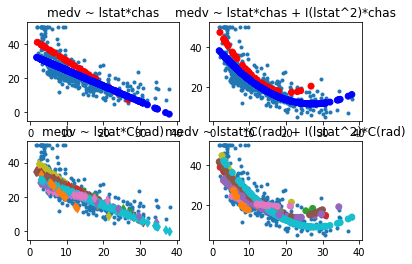

In [47]:
color_dict = {0:'C0', 1:'C1', 2:'C2', 3:'C3', 4:'C4', 5:'C5', 6:'C6', 7:'C7', 8:'C8', 24:'C9'}
color_chas = ['blue' if x == 0 else 'red' for x in boston_df['chas']]
color_rad = [color_dict[x] for x in boston_df['rad']]

fig, ax = plt.subplots(2,2)
ax[0,0].scatter(boston_df['lstat'], boston_df['medv'], marker='.')
ax[0,0].scatter(boston_df['lstat'], sm_pred1, marker='o', color=color_chas)
ax[0,0].set_title('medv ~ lstat*chas')

ax[0,1].scatter(boston_df['lstat'], boston_df['medv'], marker='.')
ax[0,1].scatter(boston_df['lstat'], sm_pred2, marker='o', color=color_chas)
ax[0,1].set_title('medv ~ lstat*chas + I(lstat^2)*chas')

ax[1,0].scatter(boston_df['lstat'], boston_df['medv'], marker='.')
ax[1,0].scatter(boston_df['lstat'], smf_pred3, marker='d', color=color_rad)
ax[1,0].set_title('medv ~ lstat*C(rad)')

ax[1,1].scatter(boston_df['lstat'], boston_df['medv'], marker='.')
ax[1,1].scatter(boston_df['lstat'], smf_pred4, marker='o', color=color_rad)
ax[1,1].set_title('medv ~ lstat*C(rad) + I(lstat^2)*C(rad)')